In [ ]:
print("Team - 5")
print("Project Name - Heart Disease Prediction System.")
print("Module - Preprocessing, Data Cleaning and Exploratory Data Analysis.")
print("Dataset used - \'framingham.csv'")

Team - 5
Project Name - Heart Disease Prediction System.
Module - Preprocessing, Data Cleaning and Exploratory Data Analysis.
Dataset used - 'framingham.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving framingham.csv to framingham.csv


In [ ]:
data=pd.read_csv(r"framingham.csv")

In [ ]:
print(data.head())

   male  age  education  currentSmoker  ...    BMI  heartRate  glucose  TenYearCHD
0     1   39        4.0              0  ...  26.97       80.0     77.0           0
1     0   46        2.0              0  ...  28.73       95.0     76.0           0
2     1   48        1.0              1  ...  25.34       75.0     70.0           0
3     0   61        3.0              1  ...  28.58       65.0    103.0           1
4     0   46        3.0              1  ...  23.10       85.0     85.0           0

[5 rows x 16 columns]


In [ ]:
x=data.iloc[:,0:16].values
y=data.iloc[:,5].values
print(x)
print(y)

[[  1.  39.   4. ...  80.  77.   0.]
 [  0.  46.   2. ...  95.  76.   0.]
 [  1.  48.   1. ...  75.  70.   0.]
 ...
 [  0.  48.   2. ...  84.  86.   0.]
 [  0.  44.   1. ...  86.  nan   0.]
 [  0.  52.   2. ...  80. 107.   0.]]
[ 0.  0.  0. ... nan  0.  0.]


In [ ]:
print(data.describe())

              male          age  ...      glucose   TenYearCHD
count  4238.000000  4238.000000  ...  3850.000000  4238.000000
mean      0.429212    49.584946  ...    81.966753     0.151958
std       0.495022     8.572160  ...    23.959998     0.359023
min       0.000000    32.000000  ...    40.000000     0.000000
25%       0.000000    42.000000  ...    71.000000     0.000000
50%       0.000000    49.000000  ...    78.000000     0.000000
75%       1.000000    56.000000  ...    87.000000     0.000000
max       1.000000    70.000000  ...   394.000000     1.000000

[8 rows x 16 columns]


In [ ]:
print(data.shape)

(4238, 16)


In [ ]:
# Checking for the missing values.
data.isnull().values.any()

True

In [ ]:
missing_value_count_by_column=(data.isnull().sum())
print(missing_value_count_by_column[missing_value_count_by_column>0])

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64


In [ ]:
#Dropping columns with missing values
#data_without_missing_values=data.dropna(axis=1)
cols_with_missing=[col for col in data.columns if data[col].isnull().any()]
reduced_original_data=data.drop(cols_with_missing,axis=1)
reduced_test_data=data.drop(cols_with_missing,axis=1)

In [ ]:
from sklearn.impute import SimpleImputer
my_imputer=SimpleImputer()
data_with_imputed_values=my_imputer.fit_transform(data)

In [ ]:
#Catgorical data  
#for Country Variable  
from sklearn.preprocessing import LabelEncoder  
label_encoder_x= LabelEncoder()  
x[:, 0]= label_encoder_x.fit_transform(x[:, 0]) 
print(x)

[[  1.  39.   4. ...  80.  77.   0.]
 [  0.  46.   2. ...  95.  76.   0.]
 [  1.  48.   1. ...  75.  70.   0.]
 ...
 [  0.  48.   2. ...  84.  86.   0.]
 [  0.  44.   1. ...  86.  nan   0.]
 [  0.  52.   2. ...  80. 107.   0.]]


In [ ]:
labelencoder_y= LabelEncoder()  
y= labelencoder_y.fit_transform(y)  
print(y)

[0 0 0 ... 3 0 0]


In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

In [ ]:
print(x_train)

[[  1.  63.   1. ...  75. 120.   0.]
 [  1.  52.   1. ...  66.  77.   0.]
 [  1.  38.   2. ...  76.  75.   0.]
 ...
 [  1.  39.   3. ...  70.  81.   0.]
 [  0.  57.   1. ...  75.  81.   0.]
 [  0.  40.   2. ...  75.  73.   0.]]


In [ ]:
print(x_test)

[[  0.  47.   1. ...  75.  62.   0.]
 [  0.  58.   2. ...  60.  73.   0.]
 [  0.  61.   2. ...  57.  78.   0.]
 ...
 [  1.  50.   3. ...  88.  77.   0.]
 [  1.  45.   4. ...  83. 105.   0.]
 [  0.  50.   1. ...  63.  75.   0.]]


In [ ]:
print(y_train)

[0 0 0 ... 0 0 0]


In [ ]:
print(y_test)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 43  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 51  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 11
  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0

In [ ]:
#To fill in missing values by their mean values
data.fillna(data.mean(),inplace=True)

In [ ]:
print(data)

      male  age  education  ...  heartRate     glucose  TenYearCHD
0        1   39        4.0  ...       80.0   77.000000           0
1        0   46        2.0  ...       95.0   76.000000           0
2        1   48        1.0  ...       75.0   70.000000           0
3        0   61        3.0  ...       65.0  103.000000           1
4        0   46        3.0  ...       85.0   85.000000           0
...    ...  ...        ...  ...        ...         ...         ...
4233     1   50        1.0  ...       66.0   86.000000           1
4234     1   51        3.0  ...       65.0   68.000000           0
4235     0   48        2.0  ...       84.0   86.000000           0
4236     0   44        1.0  ...       86.0   81.966753           0
4237     0   52        2.0  ...       80.0  107.000000           0

[4238 rows x 16 columns]


In [ ]:
# Checking for the imbalanced data based on age.
data['age'].value_counts()

40    191
46    182
42    180
41    174
48    173
39    169
44    166
45    162
43    159
52    149
51    146
55    145
38    144
47    141
50    140
53    139
54    132
49    132
57    123
56    123
59    119
58    117
60    111
61    110
63    110
62     99
64     93
37     92
36     84
65     57
67     45
35     42
66     38
68     18
34     18
69      7
33      5
70      2
32      1
Name: age, dtype: int64

In [ ]:
# Checking for any correlations.
data.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017126,0.197596,0.316807,-0.052204,-0.004546,0.005313,0.015708,-0.069974,-0.035989,0.057933,0.081506,-0.116601,0.005818,0.088428
age,-0.028979,1.000000,-0.163613,-0.213748,-0.192366,0.121980,0.057655,0.307194,0.101258,0.260270,0.394302,0.206104,0.135283,-0.012819,0.116850,0.225256
education,0.017126,-0.163613,1.000000,0.018301,0.007962,-0.010607,-0.035110,-0.080993,-0.038146,-0.022507,-0.128260,-0.061755,-0.135635,-0.053626,-0.033721,-0.053384
currentSmoker,0.197596,-0.213748,0.018301,1.000000,0.766970,-0.048632,-0.032988,-0.103260,-0.044295,-0.046285,-0.130230,-0.107746,-0.167276,0.062348,-0.054157,0.019456
cigsPerDay,0.316807,-0.192366,0.007962,0.766970,1.000000,-0.045826,-0.032706,-0.065947,-0.037063,-0.026025,-0.088505,-0.056391,-0.092453,0.074851,-0.056088,0.057775
BPMeds,-0.052204,0.121980,-0.010607,-0.048632,-0.045826,1.000000,0.115003,0.259243,0.051571,0.078909,0.252047,0.192490,0.099552,0.015175,0.048905,0.086774
prevalentStroke,-0.004546,0.057655,-0.035110,-0.032988,-0.032706,0.115003,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.024840,-0.017676,0.018055,0.061810
prevalentHyp,0.005313,0.307194,-0.080993,-0.103260,-0.065947,0.259243,0.074830,1.000000,0.077808,0.163041,0.696755,0.615751,0.300572,0.147222,0.082924,0.177603
diabetes,0.015708,0.101258,-0.038146,-0.044295,-0.037063,0.051571,0.006949,0.077808,1.000000,0.040092,0.111283,0.050329,0.086250,0.048993,0.605705,0.097317
totChol,-0.069974,0.260270,-0.022507,-0.046285,-0.026025,0.078909,0.000067,0.163041,0.040092,1.000000,0.207609,0.163903,0.114789,0.090676,0.044583,0.081624


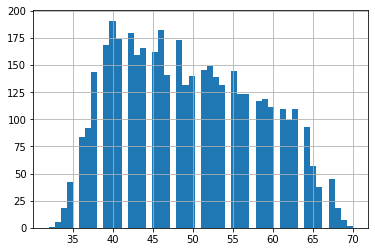

In [ ]:
# histogram of age.
data['age'].hist(bins=50)

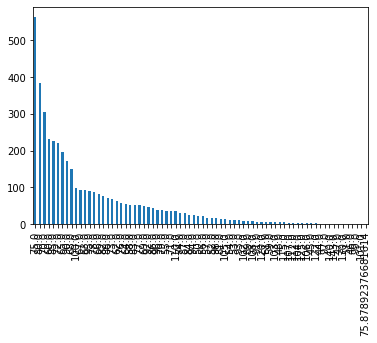

In [ ]:
# bar chart -  distribution of a categorical variable
data['heartRate'].value_counts().plot.bar()

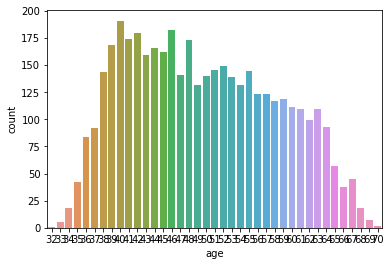

In [ ]:
sns.countplot(x='age', data=data)

In [ ]:
# Checking for the imbalanced data based on prevalentStroke.
data['prevalentStroke'].value_counts()

0    4213
1      25
Name: prevalentStroke, dtype: int64

In [ ]:
# Checking for the missing values.
data.isnull().values.any()

False

In [ ]:
print("The Dataset \'framingham.csv' is now cleaned")

The Dataset 'framingham.csv' is now cleaned


In [ ]:
print("The Dataset \'framingham.csv' is used for feature selection process")

The Dataset 'framingham.csv' is used for feature selection process


In [ ]:
#apply SelectKBest class to extract top 10 features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x=data.iloc[:,0:20] #independent columns
y=data.iloc[:,-1] #target columns
bestfeatures=SelectKBest(score_func=chi2,k=6)
fit=bestfeatures.fit(x,y)

In [ ]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)

In [ ]:
#concat two dataframes for better visualization
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['values','Scores'] #naming the dataframe columns

In [ ]:
featureScores

,values,Scores
0,male,18.915212
1,age,318.597444
2,education,6.188170
3,currentSmoker,0.811603
4,cigsPerDay,221.677041
5,BPMeds,30.578341
6,prevalentStroke,16.095638
7,prevalentHyp,92.167857
8,diabetes,39.103710
9,totChol,234.305978


In [ ]:
print(featureScores.nlargest(10,'Scores'))

          values       Scores
15    TenYearCHD  3594.000000
10         sysBP   728.292522
14       glucose   390.825416
1            age   318.597444
9        totChol   234.305978
4     cigsPerDay   221.677041
11         diaBP   153.090954
7   prevalentHyp    92.167857
8       diabetes    39.103710
5         BPMeds    30.578341


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
print(model.feature_importances_)

[3.04807363e-03 1.17888882e-02 1.89993861e-03 8.79618770e-04
 1.94728195e-03 1.54233286e-03 7.83441911e-04 1.18461501e-02
 1.89856542e-03 2.55081237e-03 6.18400633e-03 4.42337788e-03
 2.80230666e-03 2.45652503e-03 4.26656629e-03 9.41682114e-01]


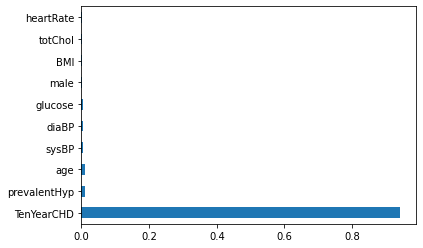

In [ ]:
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=0
)
x_train.shape,x_test.shape


((2966, 16), (1272, 16))

In [ ]:
x_train.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.032376,0.041273,0.202738,0.317662,-0.029631,0.006970,0.000124,0.016870,-0.085343,-0.039762,0.055043,0.078096,-0.121020,0.019014,0.077759
age,-0.032376,1.000000,-0.163537,-0.214773,-0.191219,0.128628,0.063679,0.314129,0.098819,0.272992,0.398299,0.213507,0.142847,-0.018479,0.113146,0.219124
education,0.041273,-0.163537,1.000000,0.019309,0.004502,-0.023410,-0.033713,-0.084182,-0.030044,-0.027716,-0.137169,-0.072596,-0.136047,-0.066930,-0.017104,-0.050165
currentSmoker,0.202738,-0.214773,0.019309,1.000000,0.757731,-0.054173,-0.044289,-0.100760,-0.042784,-0.051663,-0.127399,-0.105893,-0.162596,0.075399,-0.052274,0.022355
cigsPerDay,0.317662,-0.191219,0.004502,0.757731,1.000000,-0.044383,-0.038818,-0.054646,-0.039662,-0.027412,-0.075755,-0.047760,-0.087631,0.083048,-0.059007,0.063205
BPMeds,-0.029631,0.128628,-0.023410,-0.054173,-0.044383,1.000000,0.109865,0.251447,0.052427,0.074644,0.256577,0.192336,0.108699,-0.016744,0.049216,0.081726
prevalentStroke,0.006970,0.063679,-0.033713,-0.044289,-0.038818,0.109865,1.000000,0.075036,0.011755,-0.005043,0.065014,0.063068,0.039758,-0.025786,0.012599,0.065725
prevalentHyp,0.000124,0.314129,-0.084182,-0.100760,-0.054646,0.251447,0.075036,1.000000,0.073265,0.165814,0.706746,0.616959,0.306178,0.127813,0.080767,0.180094
diabetes,0.016870,0.098819,-0.030044,-0.042784,-0.039662,0.052427,0.011755,0.073265,1.000000,0.035654,0.107471,0.042271,0.075614,0.045548,0.614539,0.110867
totChol,-0.085343,0.272992,-0.027716,-0.051663,-0.027412,0.074644,-0.005043,0.165814,0.035654,1.000000,0.210087,0.165685,0.117534,0.084488,0.035175,0.088594


Pearson correlation


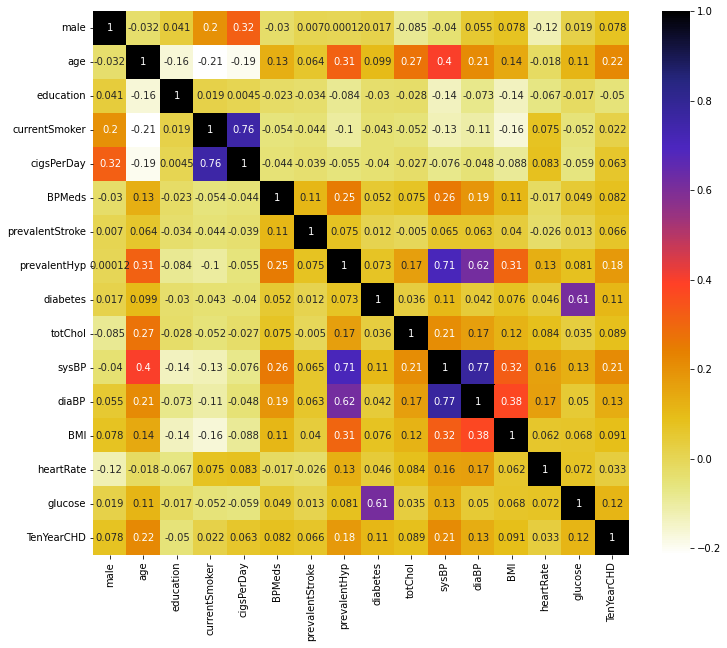

In [ ]:
import seaborn as sns
#using pearson Correlation
print("Pearson correlation")
plt.figure(figsize=(12,10))
cor=x_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset,threshold):
  col_corr=set() #set of all names of correlated columns
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
      for j in range(i):
        if abs(corr_matrix.iloc[i,j])>threshold:
          colname=corr_matrix.columns[i]
          col_corr.add(colname)
  return col_corr

In [ ]:
corr_features=correlation(x_train,0.7)
len(set(corr_features))

3

In [ ]:
corr_features

{'cigsPerDay', 'diaBP', 'sysBP'}

In [ ]:
x_train.drop(corr_features,axis=1)
x_test.drop(corr_features,axis=1)

,male,age,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD
1669,0,47,1.0,0,0.0,0,1,0,305.0,27.64,75.0,62.0,0
156,0,58,2.0,0,0.0,0,1,0,195.0,23.36,60.0,73.0,0
87,0,61,2.0,1,0.0,0,1,0,326.0,38.46,57.0,78.0,0
685,0,45,2.0,0,0.0,0,1,0,215.0,25.92,100.0,75.0,0
666,0,57,1.0,0,0.0,0,0,0,287.0,26.24,65.0,71.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324,0,58,2.0,1,0.0,0,0,0,226.0,24.00,75.0,73.0,0
3267,1,44,1.0,1,0.0,0,1,0,316.0,25.48,75.0,68.0,0
3871,1,45,1.0,1,0.0,0,1,0,256.0,26.60,75.0,83.0,0
3231,0,46,3.0,1,0.0,0,1,0,315.0,32.89,110.0,91.0,0


In [ ]:
train = data.copy()
target = train.pop('TenYearCHD')
train.head(2)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0


In [ ]:
num_features_opt = 25   # the number of features that we need to choose as a result
num_features_max = 35   # the somewhat excessive number of features, which we will choose at each stage
features_best = []

In [ ]:
#selectFromModel with linearSVC
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2
from sklearn.model_selection import train_test_split
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(train, target)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(train)
X_selected_df = pd.DataFrame(X_new, columns=[train.columns[i] for i in range(len(train.columns)) if model.get_support()[i]])
features_best.append(X_selected_df.columns.tolist())

In [ ]:
print(features_best)

[['male', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]


In [ ]:
#using lasso
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier, LassoCV
lasso = LassoCV(cv=3).fit(train, target)
model = SelectFromModel(lasso, prefit=True)
X_new = model.transform(train)
X_selected_df = pd.DataFrame(X_new, columns=[train.columns[i] for i in range(len(train.columns)) if model.get_support()[i]])
features_best.append(X_selected_df.columns.tolist())

In [ ]:
# Visualization from https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
# but to k='all'
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(train, target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
features_best.append(featureScores.nlargest(num_features_max,'Score')['Feature'].tolist())
print(featureScores.nlargest(len(dfcolumns),'Score')) 

            Feature       Score
10            sysBP  728.292522
14          glucose  390.825416
1               age  318.597444
9           totChol  234.305978
4        cigsPerDay  221.677041
11            diaBP  153.090954
7      prevalentHyp   92.167857
8          diabetes   39.103710
5            BPMeds   30.578341
0              male   18.915212
6   prevalentStroke   16.095638
12              BMI   15.177679
2         education    6.188170
13        heartRate    4.233476
3     currentSmoker    0.811603


In [ ]:
#by the SelectKBest with Chi-2
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [ ]:
#Loading data
X,y=datasets.load_wine(return_X_y=True)
# k = 4 tells four top features to be selected
# Score function Chi2 tells the feature to be selected using Chi Square
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
fit.scores_

array([5.44549882e+00, 2.80686046e+01, 7.43380598e-01, 2.93836955e+01,
       4.50263809e+01, 1.56230759e+01, 6.33343081e+01, 1.81548480e+00,
       9.36828307e+00, 1.09016647e+02, 5.18253981e+00, 2.33898834e+01,
       1.65400671e+04])

In [ ]:
X_new=test.fit_transform(X, y)

In [ ]:
print(X_new)

[[1.270000e+02 3.060000e+00 5.640000e+00 1.065000e+03]
 [1.000000e+02 2.760000e+00 4.380000e+00 1.050000e+03]
 [1.010000e+02 3.240000e+00 5.680000e+00 1.185000e+03]
 [1.130000e+02 3.490000e+00 7.800000e+00 1.480000e+03]
 [1.180000e+02 2.690000e+00 4.320000e+00 7.350000e+02]
 [1.120000e+02 3.390000e+00 6.750000e+00 1.450000e+03]
 [9.600000e+01 2.520000e+00 5.250000e+00 1.290000e+03]
 [1.210000e+02 2.510000e+00 5.050000e+00 1.295000e+03]
 [9.700000e+01 2.980000e+00 5.200000e+00 1.045000e+03]
 [9.800000e+01 3.150000e+00 7.220000e+00 1.045000e+03]
 [1.050000e+02 3.320000e+00 5.750000e+00 1.510000e+03]
 [9.500000e+01 2.430000e+00 5.000000e+00 1.280000e+03]
 [8.900000e+01 2.760000e+00 5.600000e+00 1.320000e+03]
 [9.100000e+01 3.690000e+00 5.400000e+00 1.150000e+03]
 [1.020000e+02 3.640000e+00 7.500000e+00 1.547000e+03]
 [1.120000e+02 2.910000e+00 7.300000e+00 1.310000e+03]
 [1.200000e+02 3.140000e+00 6.200000e+00 1.280000e+03]
 [1.150000e+02 3.400000e+00 6.600000e+00 1.130000e+03]
 [1.080000

In [ ]:
#by the recursive feature Elimination (RFE)with logistic Regression
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier, LassoCV
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier

In [ ]:
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_features_max, step=10, verbose=5)
rfe_selector.fit(train, target)
rfe_support = rfe_selector.get_support()
rfe_feature = train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

15 selected features


In [ ]:
features_best.append(rfe_feature)


In [ ]:
#by the recursive feature elimination with random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=200), threshold='1.25*median')
embeded_rf_selector.fit(train, target)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=200, n_jobs=None,
                                                 oob_score=False,

In [ ]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

7 selected features


In [ ]:
features_best.append(embeded_rf_feature)

In [ ]:
#variance threshold
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn import metrics
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
#Check whether all features have a sufficiently different meaning
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=10)
np.shape(selector.fit_transform(data))
features_best.append(list(np.array(data.columns)[selector.get_support(indices=False)]))

In [ ]:
#selection of best features
features_best

[['male',
  'age',
  'education',
  'cigsPerDay',
  'BPMeds',
  'prevalentStroke',
  'prevalentHyp',
  'diabetes',
  'totChol',
  'sysBP',
  'diaBP',
  'BMI',
  'heartRate',
  'glucose'],
 ['male',
  'age',
  'education',
  'cigsPerDay',
  'BPMeds',
  'prevalentHyp',
  'totChol',
  'sysBP',
  'diaBP',
  'heartRate',
  'glucose'],
 ['sysBP',
  'glucose',
  'age',
  'totChol',
  'cigsPerDay',
  'diaBP',
  'prevalentHyp',
  'diabetes',
  'BPMeds',
  'male',
  'prevalentStroke',
  'BMI',
  'education',
  'heartRate',
  'currentSmoker'],
 ['male',
  'age',
  'education',
  'currentSmoker',
  'cigsPerDay',
  'BPMeds',
  'prevalentStroke',
  'prevalentHyp',
  'diabetes',
  'totChol',
  'sysBP',
  'diaBP',
  'BMI',
  'heartRate',
  'glucose'],
 ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'],
 ['age',
  'cigsPerDay',
  'totChol',
  'sysBP',
  'diaBP',
  'BMI',
  'heartRate',
  'glucose']]

In [ ]:
main_cols_max = features_best[0]
for i in range(len(features_best)-1):
    main_cols_max = list(set(main_cols_max) | set(features_best[i+1]))
main_cols_max

['BPMeds',
 'diabetes',
 'cigsPerDay',
 'glucose',
 'diaBP',
 'male',
 'currentSmoker',
 'education',
 'heartRate',
 'prevalentHyp',
 'prevalentStroke',
 'totChol',
 'age',
 'sysBP',
 'BMI']

In [ ]:
len(main_cols_max)

15

In [ ]:
# The element is in all lists of optimal features
main_cols_min = features_best[0]
for i in range(len(features_best)-1):
    main_cols_min = list(set(main_cols_min).intersection(set(features_best[i+1])))
main_cols_min

['heartRate', 'glucose', 'diaBP', 'totChol', 'age', 'sysBP']

In [ ]:
# Most common items in all lists of optimal features
main_cols = []
main_cols_opt = {feature_name : 0 for feature_name in data.columns.tolist()}
for i in range(len(features_best)):
    for feature_name in features_best[i]:
        main_cols_opt[feature_name] += 1
df_main_cols_opt = pd.DataFrame.from_dict(main_cols_opt, orient='index', columns=['Num'])
df_main_cols_opt.sort_values(by=['Num'], ascending=False).head(num_features_opt)

,Num
age,6
totChol,6
sysBP,6
diaBP,6
heartRate,6
glucose,6
cigsPerDay,5
BMI,5
male,4
education,4


In [ ]:
main_cols = df_main_cols_opt.nlargest(num_features_opt, 'Num').index.tolist()
if not 'target' in main_cols:
    main_cols.append('target')
main_cols

['age',
 'totChol',
 'sysBP',
 'diaBP',
 'heartRate',
 'glucose',
 'cigsPerDay',
 'BMI',
 'male',
 'education',
 'BPMeds',
 'prevalentHyp',
 'prevalentStroke',
 'diabetes',
 'currentSmoker',
 'TenYearCHD',
 'target']

In [ ]:
print("Heartrate ,glucose,diabetes BP,total Cholestrol,age and sysBP are the most important element in those optimal features ")

Heartrate ,glucose,diabetes BP,total Cholestrol,age and sysBP are the most important element in those optimal features 


In [ ]:
print("the dataset \'frahmingham' was successfully feature selected")

the dataset 'frahmingham' was successfully feature selected
